In [42]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch

In [43]:
model_name = 'bert-large-uncased-whole-word-masking-finetuned-squad'

In [44]:
model = BertForQuestionAnswering.from_pretrained(model_name)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [45]:
tokenizer = BertTokenizer.from_pretrained(model_name)

# Embeddings

In [46]:
# example question and text containing the answer
question = "Who founded Amazon and in what year was it founded?"
answer_document = """
Amazon is one of the world's largest e-commerce and technology companies, offering everything from online shopping to cloud computing, streaming services, and artificial intelligence. 
The company was founded on July 5, 1994, by Jeff Bezos in his garage in Bellevue, Washington. 
Jeff Bezos, a former Wall Street analyst and Princeton graduate, started Amazon as an online bookstore under the initial name 'Cadabra' (later changed to Amazon to evoke the vast Amazon River and suggest endless selection). 
From humble beginnings selling books online, Amazon quickly expanded into 'The Everything Store,' adding electronics, toys, groceries, and more. 
In 1997, Amazon went public on the NASDAQ stock exchange, marking a major milestone in its growth. 
Today, Amazon operates massive fulfillment centers across the United States, employs millions of people, and dominates industries like AWS (Amazon Web Services), which powers much of the internet. 
The company's headquarters are now split between Seattle, Washington, and Arlington, Virginia (near Washington D.C.), reflecting its deep roots in American innovation and logistics. 
Amazon's commitment to customer obsession, fast delivery (like Prime two-day shipping), and bold investments in new technologies has made it a cornerstone of modern American business.
"""

In [47]:
encoding = tokenizer.encode_plus(
    text=question, 
    text_pair = answer_document
)      

In [48]:
print(encoding)

{'input_ids': [101, 2040, 2631, 9733, 1998, 1999, 2054, 2095, 2001, 2009, 2631, 1029, 102, 9733, 2003, 2028, 1997, 1996, 2088, 1005, 1055, 2922, 1041, 1011, 6236, 1998, 2974, 3316, 1010, 5378, 2673, 2013, 3784, 6023, 2000, 6112, 9798, 1010, 11058, 2578, 1010, 1998, 7976, 4454, 1012, 1996, 2194, 2001, 2631, 2006, 2251, 1019, 1010, 2807, 1010, 2011, 5076, 2022, 28370, 1999, 2010, 7381, 1999, 26756, 1010, 2899, 1012, 5076, 2022, 28370, 1010, 1037, 2280, 2813, 2395, 12941, 1998, 9173, 4619, 1010, 2318, 9733, 2004, 2019, 3784, 21785, 2104, 1996, 3988, 2171, 1005, 28353, 7875, 2527, 1005, 1006, 2101, 2904, 2000, 9733, 2000, 23408, 11045, 1996, 6565, 9733, 2314, 1998, 6592, 10866, 4989, 1007, 1012, 2013, 15716, 16508, 4855, 2808, 3784, 1010, 9733, 2855, 4423, 2046, 1005, 1996, 2673, 3573, 1010, 1005, 5815, 8139, 1010, 10899, 1010, 26298, 1010, 1998, 2062, 1012, 1999, 2722, 1010, 9733, 2253, 2270, 2006, 1996, 17235, 2850, 4160, 4518, 3863, 1010, 10060, 1037, 2350, 19199, 1999, 2049, 3930, 1012

In [49]:
inputs = encoding['input_ids']
sentence_embedding = encoding['token_type_ids']
tokens = tokenizer.convert_ids_to_tokens(inputs)

In [50]:
tokenizer.decode(101)

'[CLS]'

In [51]:
tokenizer.decode(102)

'[SEP]'

In [52]:
output = model(
    input_ids=torch.tensor([inputs]),
    token_type_ids=torch.tensor([sentence_embedding])
)

# Model output

In [53]:
start_index = torch.argmax(output.start_logits)
end_index = torch.argmax(output.end_logits)

print(start_index)
print(end_index)

tensor(53)
tensor(53)


In [54]:
answer= ''.join(tokens[start_index:end_index+1])
print(answer)

1994


In [55]:
import matplotlib as plt
import seaborn as sns

In [56]:
s_scores = output.start_logits.detach().numpy().flatten()
e_scores = output.end_logits.detach().numpy().flatten()


In [57]:
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))

/tmp/ipykernel_27895/3547080240.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


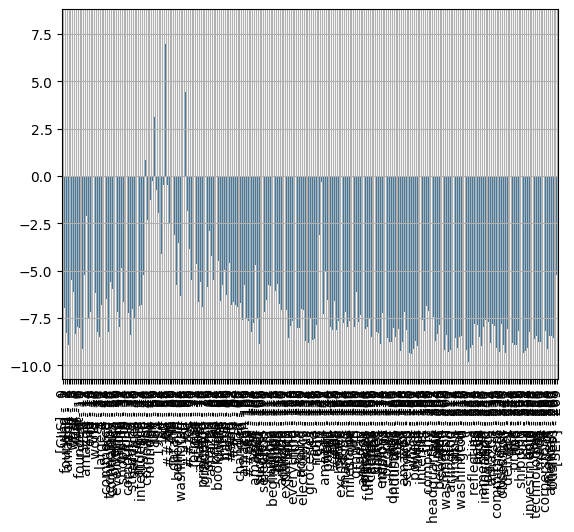

In [58]:
ax = sns.barplot(x=token_labels, y=s_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.grid(True)

/tmp/ipykernel_27895/285056003.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


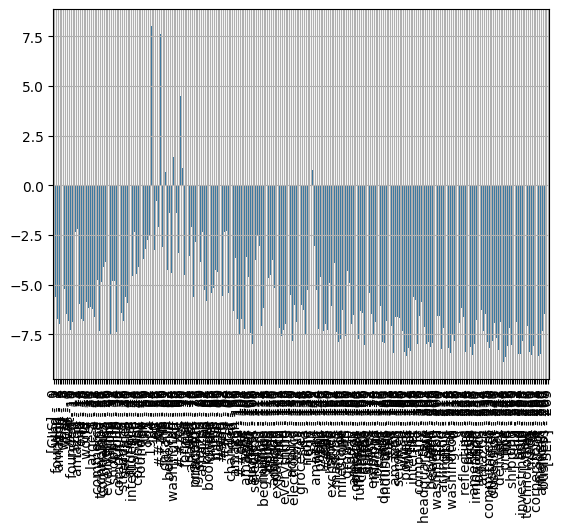

In [59]:
ax = sns.barplot(x=token_labels, y=e_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.grid(True)

# Question Answering

In [60]:
galactic_horizons_text = "The first commercial spaceflight by Galactic Horizons took place on October 12, 2015. The mission, named 'Starlight-1', launched from the Atacama Desert in Chile. This event marked the beginning of a new era in private space exploration. Galactic Horizons is a pioneering aerospace corporation that has been at the forefront of orbital logistics since its inception in 1994. Headquartered in the high-tech hub of Neo-Tokyo, Japan, Galactic Horizons has established a legacy of innovation and safety over the last thirty years. Founded by the brilliant engineer Dr. Elena Vance, the company started as a small research lab focused on satellite propulsion. Under Dr. Vance’s guidance, it transformed into a global giant manufacturing reusable rockets and deep-space habitats. Today, the corporation operates three massive spaceports worldwide. A key milestone occurred in 2022, when Galactic Horizons successfully tested its first fusion-powered engine, drastically reducing travel time to Mars. This breakthrough solidified its position as a leader in interplanetary travel. The company currently partners with major agencies like NASA, ESA, and JAXA, providing reliable transport for scientific payloads."
print(galactic_horizons_text)

The first commercial spaceflight by Galactic Horizons took place on October 12, 2015. The mission, named 'Starlight-1', launched from the Atacama Desert in Chile. This event marked the beginning of a new era in private space exploration. Galactic Horizons is a pioneering aerospace corporation that has been at the forefront of orbital logistics since its inception in 1994. Headquartered in the high-tech hub of Neo-Tokyo, Japan, Galactic Horizons has established a legacy of innovation and safety over the last thirty years. Founded by the brilliant engineer Dr. Elena Vance, the company started as a small research lab focused on satellite propulsion. Under Dr. Vance’s guidance, it transformed into a global giant manufacturing reusable rockets and deep-space habitats. Today, the corporation operates three massive spaceports worldwide. A key milestone occurred in 2022, when Galactic Horizons successfully tested its first fusion-powered engine, drastically reducing travel time to Mars. This b

In [61]:
def faq_bot(question):
    context = galactic_horizons_text
    
    input_ids = tokenizer.encode(question, context)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    
    sep_idx = input_ids.index(tokenizer.sep_token_id)
    
    num_seg_a = sep_idx + 1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    
    output = model(
        torch.tensor([input_ids]), 
        token_type_ids = torch.tensor([segment_ids])
    )
    
    
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)
   
    if answer_end >= answer_start:
        answer = ''.join(tokens[answer_start:answer_end+1])
    else:
        print("I don't know how to answer this question, can you ask another one?")
    corrected_answer = ''
    
    for word in answer.split():
        if word[0:2] == '##':
            corrected_answer += word[2:]
        else:
            corrected_answer += ' ' + word
    return corrected_answer

In [62]:
faq_bot("Who founded Galactic Horizons and in what year was the fusion-powered engine tested?")

' 202##2'

In [63]:
faq_bot("Where is Galactic Horizons headquartered")

' neo-tokyo,japan'

In [64]:
faq_bot("How large is Galactic Horizons in terms of spaceports?")

' three'

In [65]:
print(faq_bot("Who founded Galactic Horizons?"))

 dr.elenavance


# RoBERTa and DistilBERT

In [31]:
from transformers import RobertaTokenizer, RobertaModel
model_name = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaModel.from_pretrained(model_name)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [66]:
from transformers import DistilBertTokenizer, DistilBertModel
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)